# Not showing on medical Appointments

the data set link is https://www.kaggle.com/datasets/joniarroba/noshowappointments/data

In this data set we are seeing a pattern of not showing on medical appointments. I will check whether there is any pattern or a trend that is followed!

## Loading the data and Checking the data

### Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

### Loading The Dataset

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


# EDA

### Exploring the Dataset

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.shape

(110527, 14)

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
df.PatientId.nunique()

62299

In [10]:
df[['PatientId', 'No-show']].duplicated().sum()

38710

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here I have seen the anomly where the age is not correct (as the age can never be a negative value) and is the outlier so i removed it!

In [13]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data Pre-processing

In [14]:
df.drop(df[df['Age'] == -1].index, inplace=True)

In [15]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The name of the columns were incorrect so I edited them and made them correct!

In [16]:
df.rename(columns={'Hipertension':'Hypertension', 'No-show':'No_Show'},inplace=True)

In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Dropping the duplicates

In [18]:
df.drop_duplicates(['PatientId', 'No_Show'],inplace=True)

In [19]:
df.shape

(71816, 14)

Dropping the columns which are of no use!

In [20]:
df.drop(columns=['PatientId','AppointmentID','ScheduledDay', 'AppointmentDay'],inplace=True)

In [21]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Analysis and Visualization

In [22]:
categorical_cols = df.select_dtypes(include=object).columns.tolist()


In [23]:
numerical_cols = df.select_dtypes(exclude=object).columns.tolist()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hypertension'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>],
       [<Axes: title={'center': 'SMS_received'}>, <Axes: >, <Axes: >]],
      dtype=object)

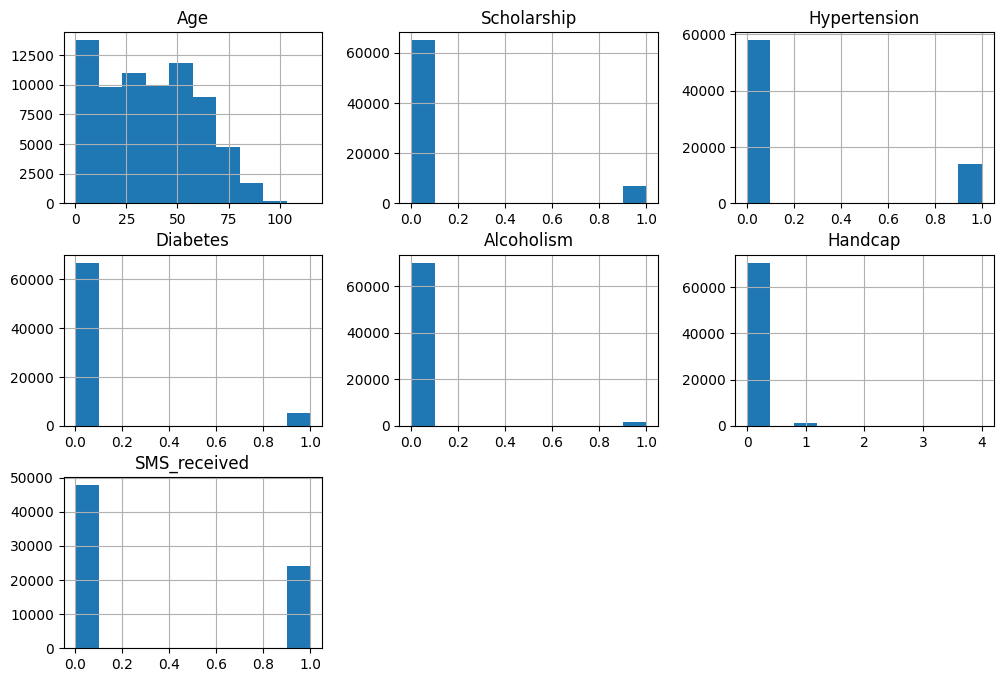

In [24]:
df.hist(figsize=(12,8))

In [25]:
df.groupby('No_Show').count()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
No_Show,,,,,,,,,
No,54153,54153,54153,54153,54153,54153,54153,54153,54153
Yes,17663,17663,17663,17663,17663,17663,17663,17663,17663


In [26]:
show = df.No_Show == 'Yes'
noshow = df.No_Show == 'No'

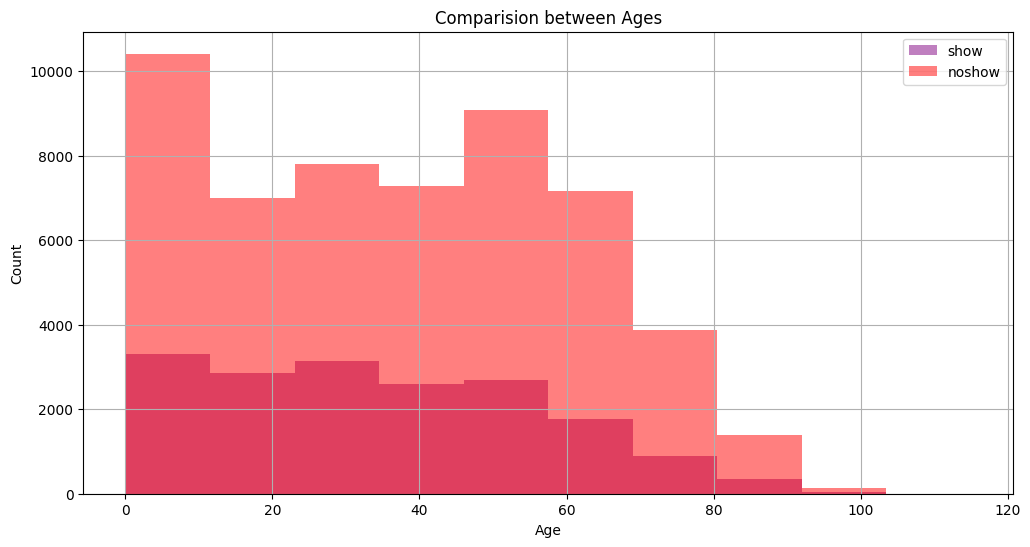

In [27]:
plt.figure(figsize=[12,6])
df['Age'][show].hist(alpha=0.5,color='purple',label='show')
df['Age'][noshow].hist(alpha=0.5,color='red',label='noshow')
plt.legend()
plt.title('Comparision between Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

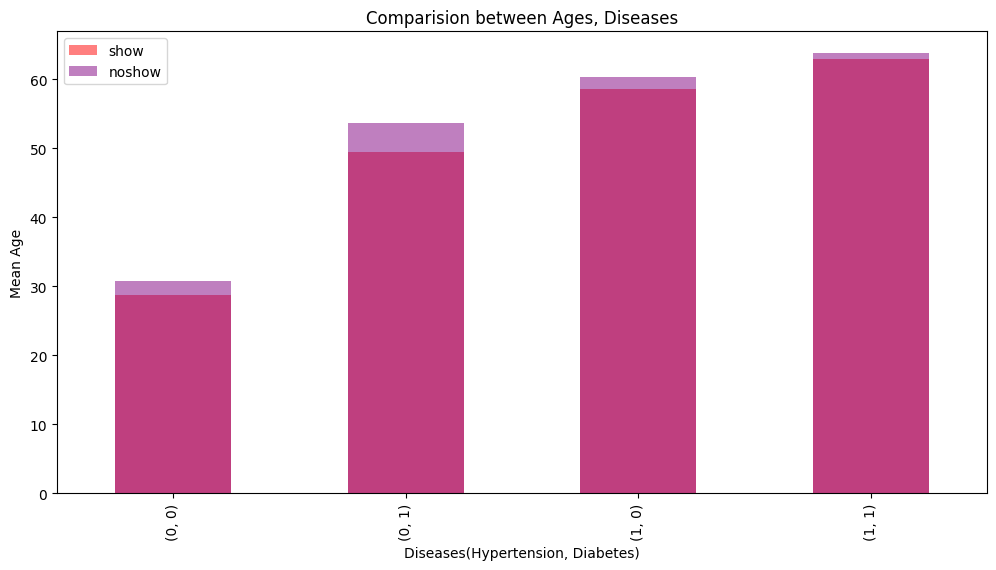

In [28]:
plt.figure(figsize=[12,6])
df[show].groupby(['Hypertension','Diabetes'])['Age'].mean().plot.bar(alpha=0.5, color='red',label='show')
df[noshow].groupby(['Hypertension','Diabetes'])['Age'].mean().plot.bar(alpha=0.5,color='purple',label='noshow')
plt.legend()
plt.title('Comparision between Ages, Diseases')
plt.xlabel('Diseases(Hypertension, Diabetes)')
plt.ylabel('Mean Age')
plt.show()

In [29]:
df[show].groupby(['Hypertension','Diabetes'])['Age'].mean(),df[noshow].groupby(['Hypertension','Diabetes'])['Age'].mean()

(Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64)

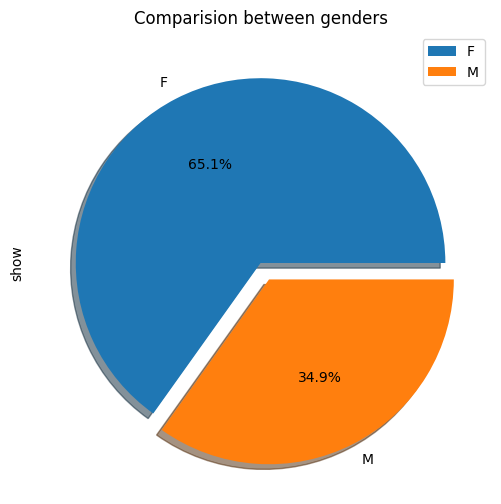

In [30]:
plt.figure(figsize=[12,6])
df['Gender'][show].value_counts(normalize=True).plot.pie(shadow=True,label='show',explode=[0,0.1], autopct='%1.1f%%')
plt.legend()
plt.title('Comparision between genders')
plt.show()

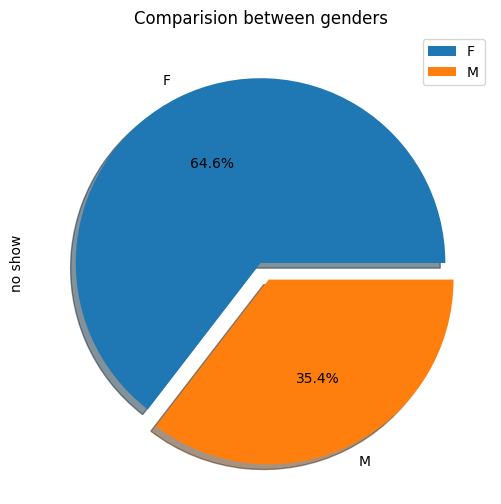

In [31]:
plt.figure(figsize=[12,6])
df['Gender'][noshow].value_counts(normalize=True).plot.pie(shadow=True,label='no show',explode=[0,0.1], autopct='%1.1f%%')
plt.legend()
plt.title('Comparision between genders')
plt.show()

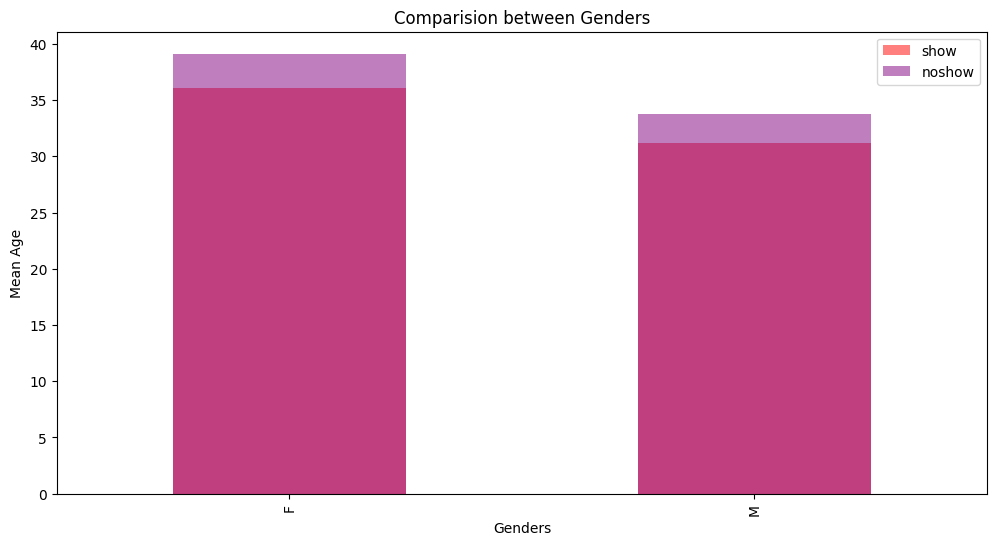

In [32]:
plt.figure(figsize=[12,6])
df[show].groupby(['Gender'])['Age'].mean().plot.bar(alpha=0.5, color='red',label='show')
df[noshow].groupby(['Gender'])['Age'].mean().plot.bar(alpha=0.5,color='purple',label='noshow')
plt.legend()
plt.title('Comparision between Genders')
plt.xlabel('Genders')
plt.ylabel('Mean Age')
plt.show()

In [33]:
df[show].groupby(['Gender'])['Age'].mean(),df[noshow].groupby(['Gender'])['Age'].mean()

(Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64,
 Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64)

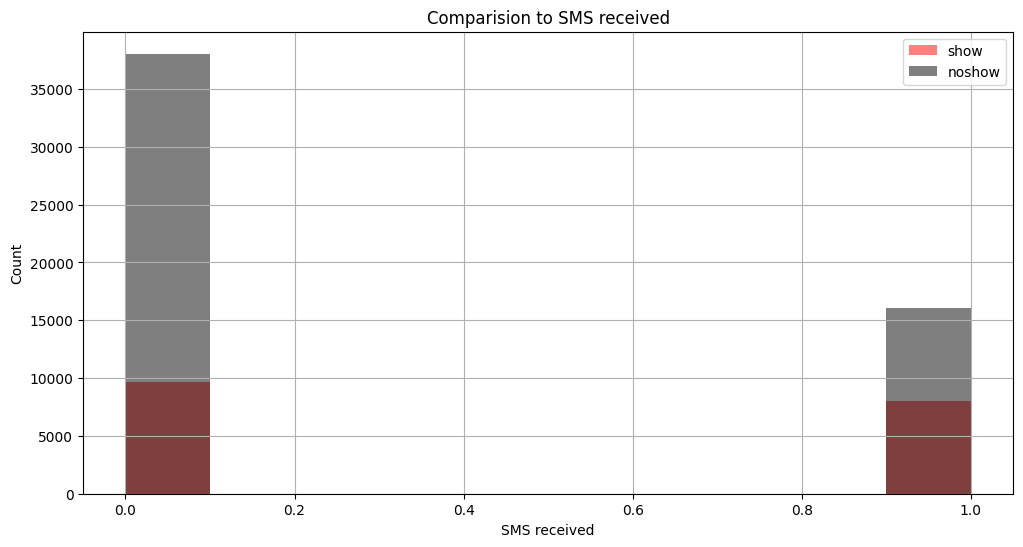

In [34]:
plt.figure(figsize=[12,6])
df['SMS_received'][show].hist(alpha=0.5,color='red',label='show')
df['SMS_received'][noshow].hist(alpha=0.5,color='black',label='noshow')
plt.legend()
plt.title('Comparision to SMS received')
plt.xlabel('SMS received')
plt.ylabel('Count')
plt.show()

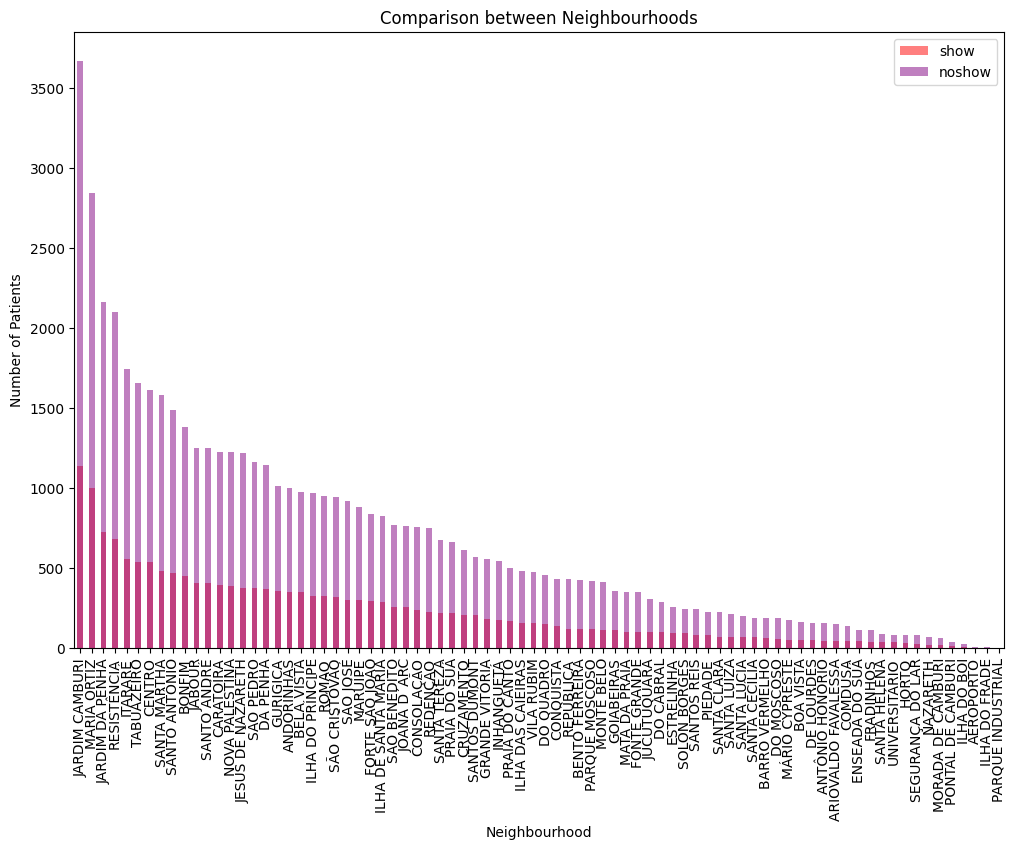

In [35]:
plt.figure(figsize=[12,8])
df['Neighbourhood'][show].value_counts().plot.bar(alpha=0.5,color = 'red',label = 'show')
df['Neighbourhood'][noshow].value_counts().plot.bar(alpha=0.5,color = 'purple',label = 'noshow')
plt.legend()
plt.title('Comparison between Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients')
plt.show()

In conclusion most people do not show on their appointments because of many reasons and this leads to serious problems!

In [36]:
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


This data set is not for the checking the accuracy or making predictions out of it, its just the data visulaization and to see the trends of the data sets!